In [8]:
# Выгрузим первый dataset - rhob_10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/Users/aleksandrbogdanov/MyJupyterNotebook/Rhob/rhob_10.csv'
rhob_10 = pd.read_csv(filepath)
rhob_10 = np.array(rhob_10.values)
rhob_10 = rhob_10[:,0]
rhob_10

array([2.44414656, 2.45095589, 2.45902057, 2.36738189, 2.59652333,
       2.4355661 , 2.48444259, 2.48348978, 2.53963421, 2.48154373,
       2.14335849, 1.82966678, 2.09292928, 1.94828511, 1.83738742,
       1.96628479, 1.90219911, 2.00119922, 1.95767349, 2.21177764,
       2.01779528, 1.98925697, 2.03636751, 2.14144577, 2.0916327 ,
       2.42838457, 2.73431611, 2.48226912, 2.52745686, 2.46893073,
       2.00014244, 1.88196045, 1.96198889, 1.99838879, 1.84409972,
       2.13900343, 2.04961801, 1.94686734, 2.02334872, 2.02628619,
       2.43617178, 2.1227801 , 2.320668  , 2.34623394, 2.27821659,
       2.25738333, 2.43575182, 2.17112872, 2.29343095, 2.22748294,
       2.25196888, 2.42603741, 2.33787234, 2.26816098, 2.34789036,
       1.88426341, 1.96514781, 2.06018358, 1.81442598, 1.82505646,
       1.94983795, 2.19667615, 2.01346225, 1.89253237, 2.13839615,
       2.26040926, 2.16341943, 2.33893062, 2.31607129, 2.15933469,
       2.30511191, 2.29771058, 2.24314216, 2.30956308, 2.30208

In [12]:
# Создадим произвольный интервал в скважине (2000-2100) - запись с шагом в метр

interval = np.arange(2000, 2099, 1)
interval.shape

(99,)

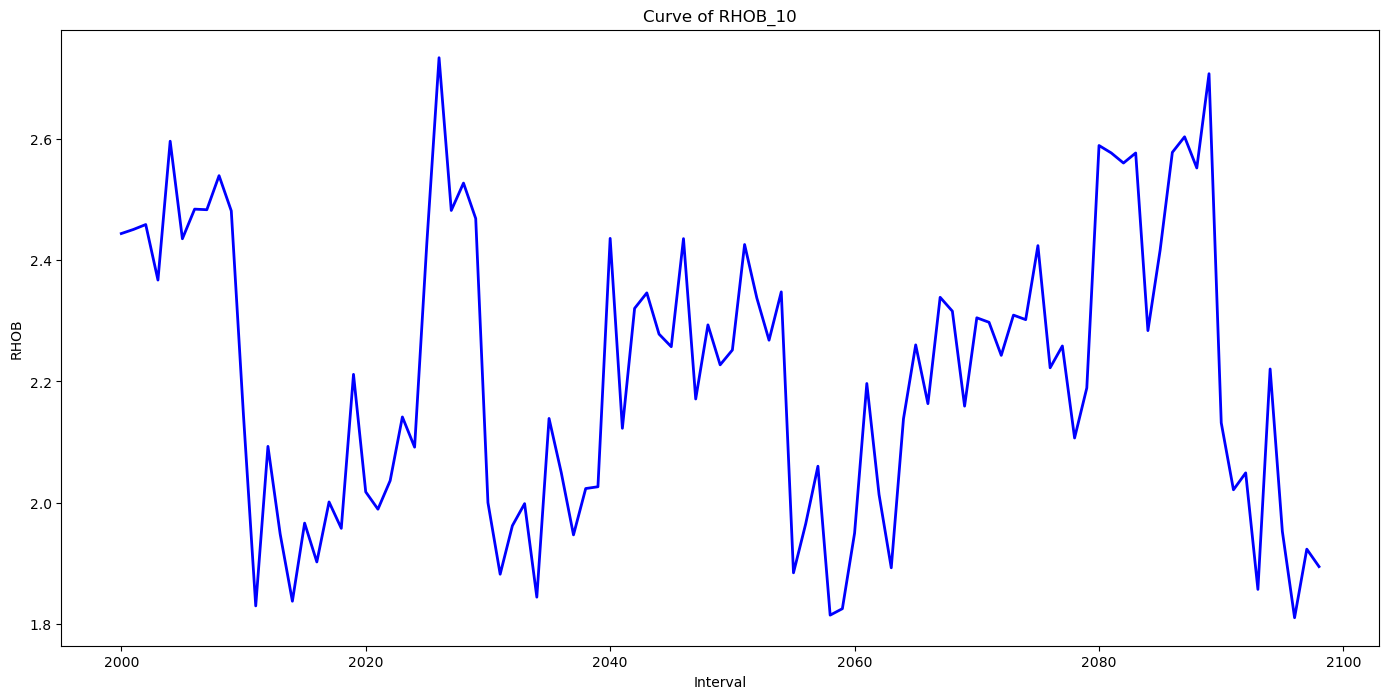

In [13]:
# Визуализируем первую запись - rhob_10
# Видим, что это самая зашумленная запись, оставим ее на конец :)

plt.figure(figsize=(17,8))

plt.plot(interval, rhob_10, c = 'b', lw = 2)
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_10')

plt.show()

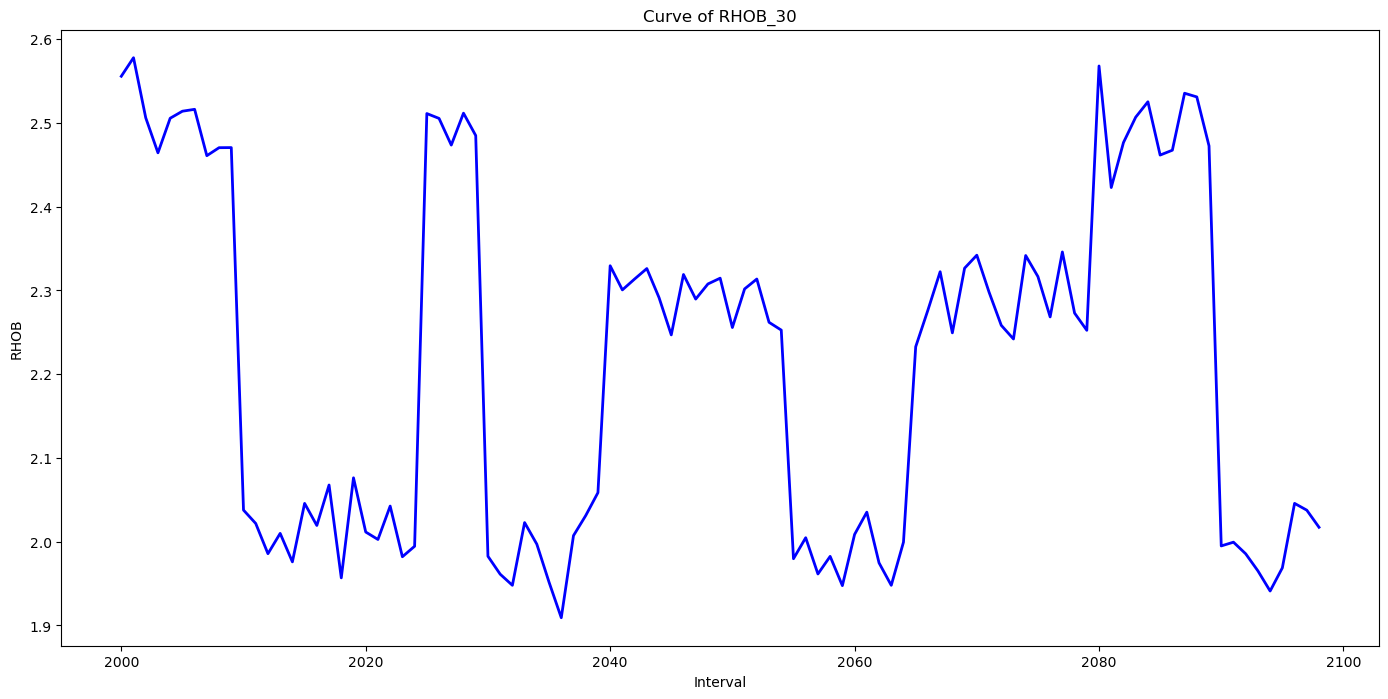

In [14]:
# Аналогичные действия для rhob_30
# Видим, что здесь меньше шума

filepath = '/Users/aleksandrbogdanov/MyJupyterNotebook/Rhob/rhob_30.csv'
rhob_30 = pd.read_csv(filepath)
rhob_30 = np.array(rhob_30.values)
rhob_30 = rhob_30[:,0]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_30, c = 'b', lw = 2)
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_30')

plt.show()

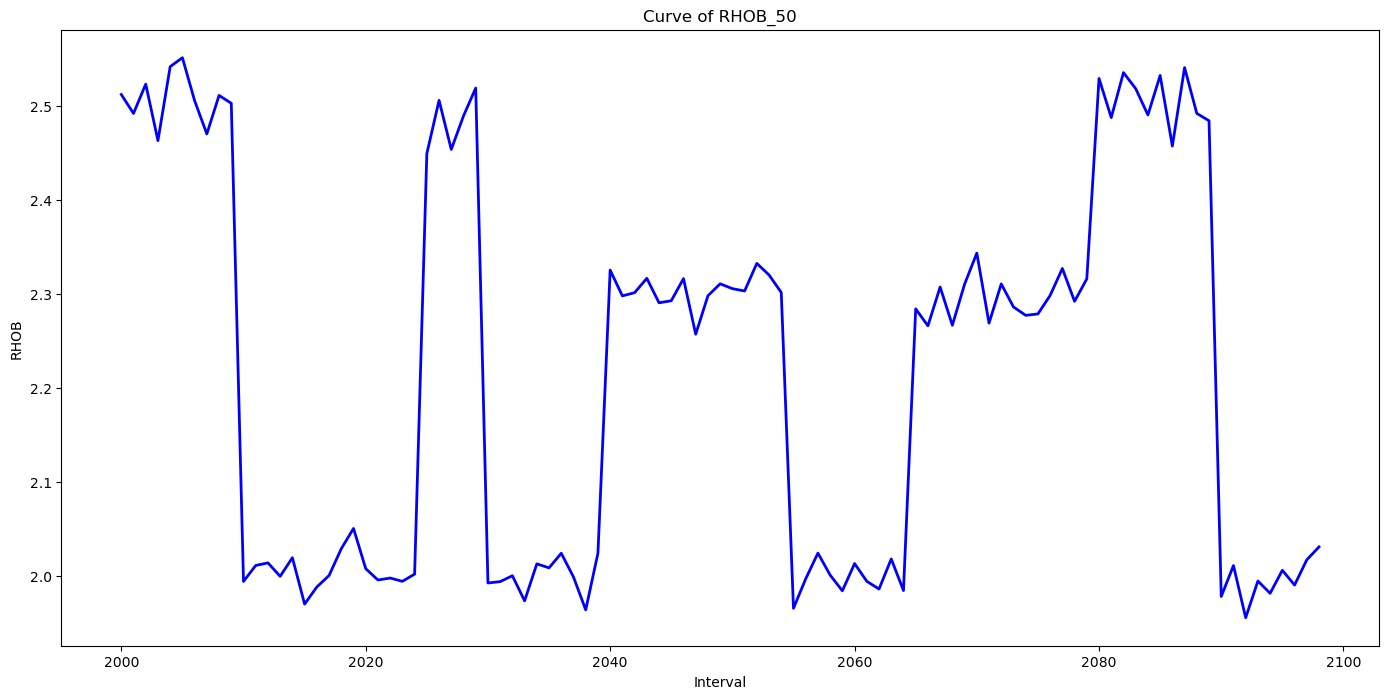

In [15]:
# И для rhob_50
# Эти измерения зашумлены МЕНЬШЕ всех, начнем с него!

filepath = '/Users/aleksandrbogdanov/MyJupyterNotebook/Rhob/rhob_50.csv'
rhob_50 = pd.read_csv(filepath)
rhob_50 = np.array(rhob_50.values)
rhob_50 = rhob_50[:,0]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_50, c = 'b', lw = 2)
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_50')

plt.show()

In [ ]:
# ВИДИМ, что для всех 3х графиков наилучшее количество описывающих их прямых - 3
# В случае rhob_10, может быть и 2 из-за шума



In [27]:
# Теперь посмотрим как с помощью прямых можно приблизить измерения, возьмем сначала одну - среднее
# Затем разделим массив на две части так, чтобы сумма квадратов ошибок в обеих частях была минимальной. 
# Сделаем это с помощью перебора, найдя лучшую границу - возьмем в обеих частях среднее и приблизим 2 прямыми
# Проделаем тоже самое с разделением на 3 части, и в заключении рассмотрим с 4-мя

# СНАЧАЛА РАБОТАЕМ С rhob_50!



2.21789964096049

RHOB_50

In [16]:
df_1 = rhob_50.mean() # Делаем первое приближение с помощью среднего

sum_for_check_1 = np.var(rhob_50) # чтобы оценить вклад приближения, везде будем фиксировать sum_for_check
sum_for_check_1

0.04413162608822791

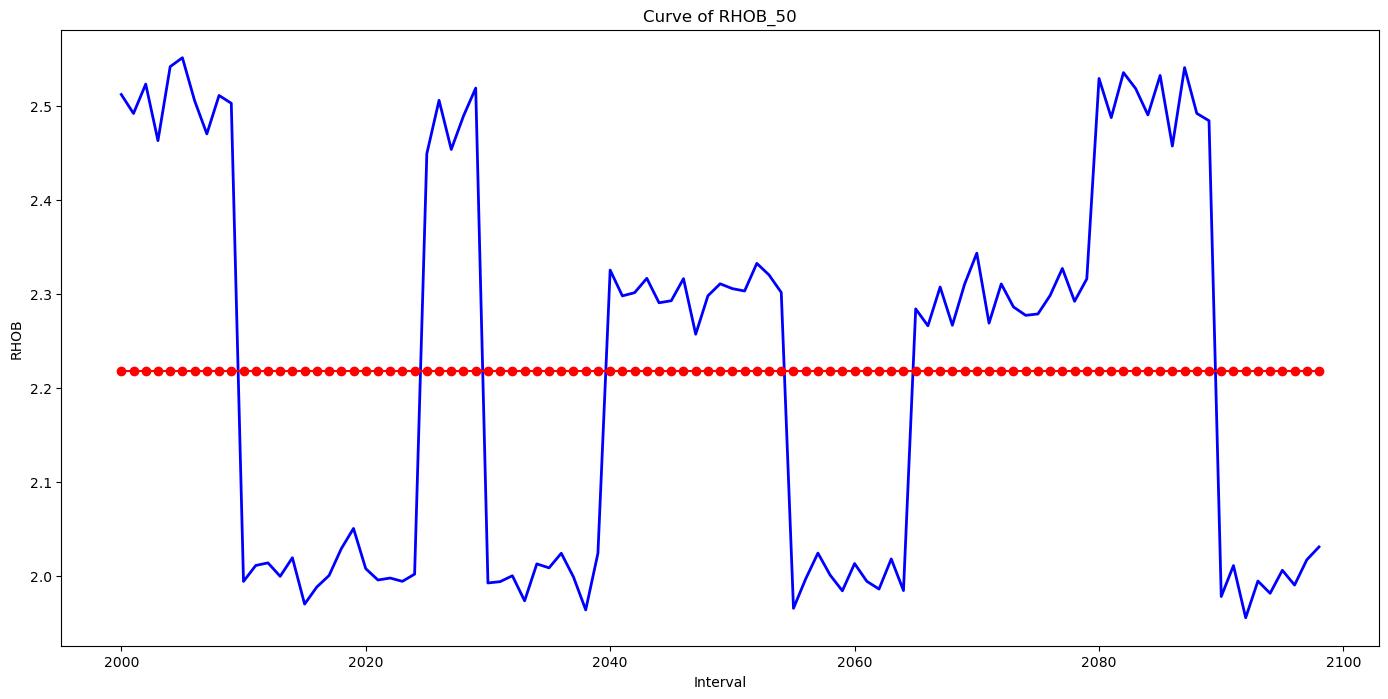

In [17]:
# Добавим на график rhob_50, Посмотрим как приближает среднее

df_1_plot = [df_1 for i in range(99)]

plt.figure(figsize=(17,8))

plt.plot(interval, rhob_50, c = 'b', lw = 2)
plt.plot(interval, df_1_plot, c = 'r', marker = 'o')
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_50')

plt.show()

In [18]:
# Теперь разделим массив на 2 части по принципу - наименьшая суммарная квадратичная ошибка в каждой
# Используем функцию, чтобы применить ее для rhob_30 и rhob_10

def separate_on_two_arrays(array):
    
    new_array = np.array(sorted(array))
    loss_array = [] # переменная хранит минимальную сумму отклонений от среднего в первой и второй частях массива
    k_array = [] # тут будет храниться индекс - после какого элемента нужно разбивать массив
 # здесь хранится минимальная сумма квадратов отклонений от среднего (для последующей визуализации)
    
    for k_bound in range(1, 99): # граница начинается после первого элемента и заканчивается перед последним

        sum_loss = 0  # сумма лосс-функций
        left_loss = 0 # функция ошибок первой части исходного массива
        right_loss = 0 # функция ошибок второй части массива

        left_arr = new_array[:k_bound] # разделяем массив по границе k - изначально она стоит после первого элемента, заканчивается перед последним эл-том
        right_arr = new_array[k_bound:]

        left_loss = np.var(left_arr) # считаем сумму квадратичных отклонений от среднего
        right_loss = np.var(right_arr)


        sum_loss = left_loss + right_loss # суммируем квадраты отклонений от среднего в первой и второй части

        loss_array.append(sum_loss)
        k_array.append(k_bound)
    
    # разобъем исходный массив на 2 части, исходя из найденной границы k
    
    min_ind = np.argmin(loss_array)
    k_bound = k_array[min_ind]
    sum_for_check_2 = loss_array[min_ind]
    
    print(f'Лучшее разбиение -  после {k_bound} элемента ставим границу')
    
    deltaf_l = new_array[:k_bound]
    deltaf_r = new_array[k_bound:]
    return deltaf_l, deltaf_r, sum_for_check_2

deltaf_1, deltaf_2, sum_for_check_2 = separate_on_two_arrays(rhob_50)

sum_for_check_2

Лучшее разбиение -  после 44 элемента ставим границу


0.011116577825184456

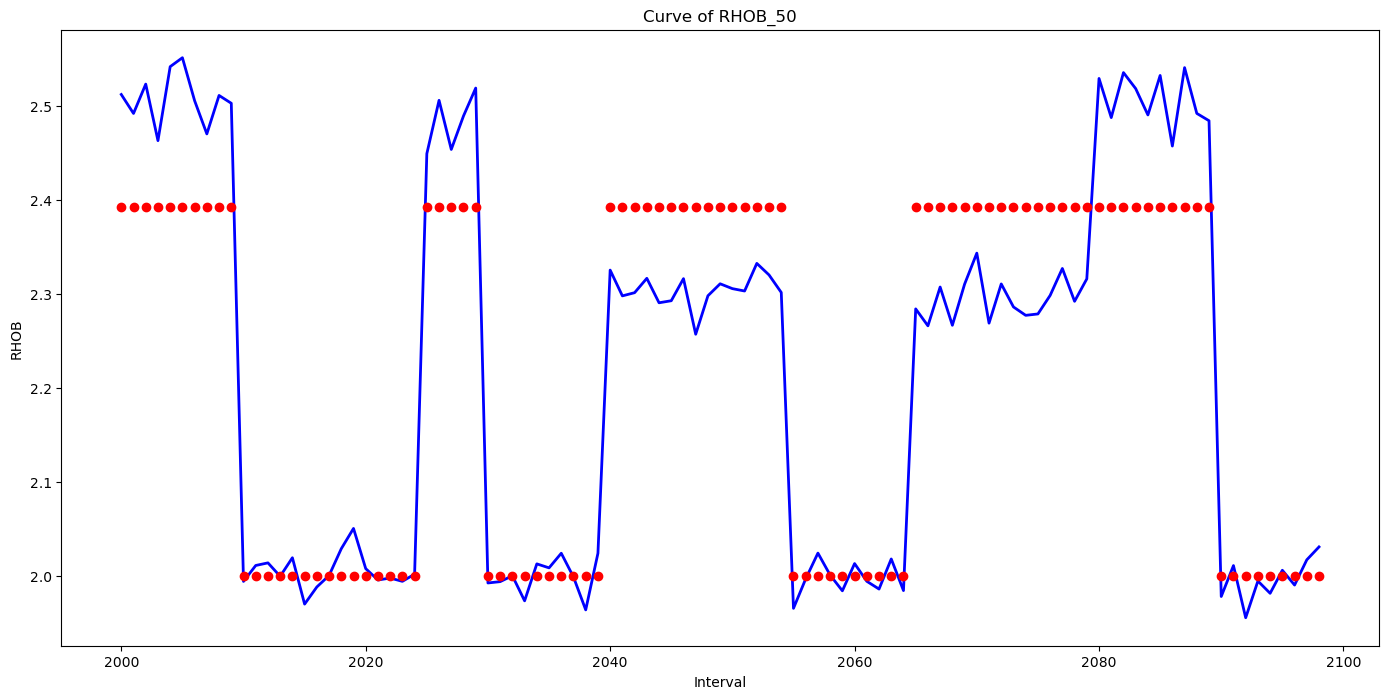

In [19]:
# Визуализируем приближения двумя линиями

deltaf_1_mean = deltaf_1.mean()
deltaf_2_mean = deltaf_2.mean()

deltaf_1_plot = [deltaf_1_mean for i in range(99)]
deltaf_2_plot = [deltaf_2_mean for i in range(99)]



plt.figure(figsize=(17,8))

plt.plot(interval, rhob_50, c = 'b', lw = 2)

for i in range(99):
    if rhob_50[i] > 2.2:
        plt.plot(interval[i], deltaf_2_plot[i], c = 'r', marker = 'o')
    else:
        plt.plot(interval[i], deltaf_1_plot[i], c = 'r', marker = 'o')
        
plt.xlabel('Interval')
plt.ylabel('RHOB', fontsize = 10)
plt.title('Curve of RHOB_50')

plt.show()

In [20]:
# Разбиение на 3 массива и приближение 3мя прямыми

def separate_on_three_arrays(array):
    
    new_array = np.array(sorted(array))

    k = 1 # наша 1 граница (до какой границы не включительно берем элементы)
    m = 2 # наша 2 граница (до какой границы не включительно берем элементы)

    loss_array_3 = [] # здесь будет храниться минимальная сумма функций потерь (квадрат отклонения от среднего)
    km_array = [] # здесь хранятся соответствующие границы (k m) - наилучшее разбиение
    
    
    for k_bound in range(1, 97): # последняя граница - после 97го

        for m_bound in range(k_bound + 1, 98): # последняя граница - после 98го

            sum_loss = 0  # сумма лосс-функций
            left_loss = 0 # функция ошибок первой части исходного массива
            central_loss = 0 # функция ошибок для второй части массива
            right_loss = 0 # функция ошибок третьей части массива

            left_arr = new_array[:k_bound] # разделяем массив по границе k - изначально она стоит после первого элемента, заканчивается перед последним эл-том
            central_arr = new_array[k_bound:m_bound]
            right_arr = new_array[m_bound:]  

            left_loss = np.var(left_arr) # считаем сумму квадратов отклонений от среднего
            right_loss = np.var(right_arr)
            central_loss = np.var(central_arr)

            sum_loss = left_loss + central_loss + right_loss # суммируем квадраты отклонения от среднего
            
            loss_array_3.append(sum_loss)
            km_array.append((k_bound, m_bound)) # здесь две соответствующие границы k и m


    
    # разбиваем исходный массив относительно найденных границ k и m
    
    min_ind = np.argmin(loss_array_3)
    k_bound = km_array[min_ind][0]
    m_bound = km_array[min_ind][1]
    sum_for_check_3 = loss_array_3[min_ind]
    
    print(f'Лучшее разбиение -  после {k_bound} и {m_bound} элементов ставим границу')


    
    deltaf_l = new_array[:k_bound]
    deltaf_c = new_array[k_bound:m_bound]
    deltaf_r = new_array[m_bound:]
    return deltaf_l, deltaf_c, deltaf_r, sum_for_check_3

deltaf_l, deltaf_c, deltaf_r, sum_for_check_3 = separate_on_three_arrays(rhob_50)


Лучшее разбиение -  после 44 и 74 элементов ставим границу


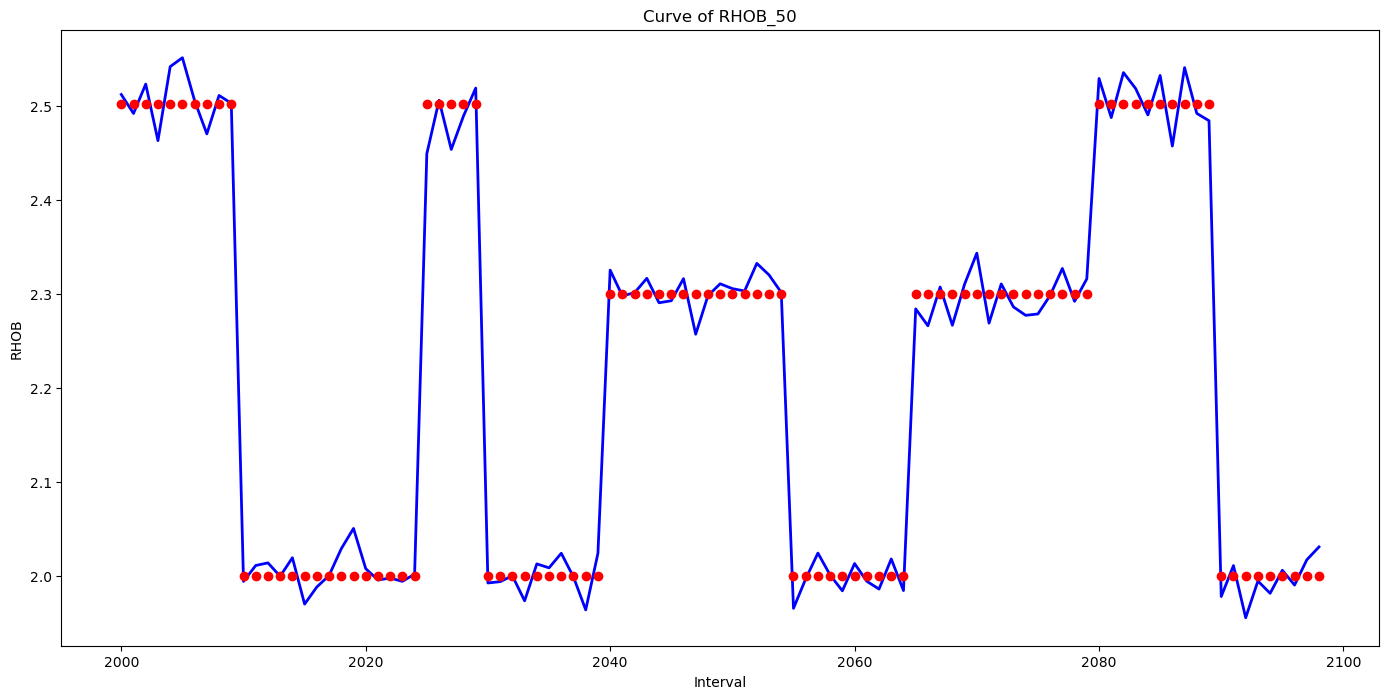

In [21]:
# Визуализируем с приближением тремя прямыми

deltaf_l_mean = deltaf_l.mean()
deltaf_c_mean = deltaf_c.mean()
deltaf_r_mean = deltaf_r.mean()

deltaf_l_plot = [deltaf_l_mean for i in range(99)]
deltaf_c_plot = [deltaf_c_mean for i in range(99)]
deltaf_r_plot = [deltaf_r_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_50, c = 'b', lw = 2)

for i in range(99):
    if rhob_50[i] > 2.4:
        plt.plot(interval[i], deltaf_r_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_50[i] < 2.4 and rhob_50[i] > 2.2:
        plt.plot(interval[i], deltaf_c_plot[i], c = 'r', marker = 'o', ls = '--')
    else:
        plt.plot(interval[i], deltaf_l_plot[i], c = 'r', marker = 'o', ls = '--')
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_50')

plt.show()

In [22]:
# Теперь, для сравнения с приближением тремя прямыми, разабъем массив на 4 части
# Оценим насколько приближение 4-мя прямыми лучше, чем тремя

def separate_on_four_arrays(array):
    
    new_array = np.array(sorted(array))
    
    k = 1 # наша 1 граница
    m = 2 # наша 2 граница
    n = 3 # наша 3 граница

    loss_array_4 = [] # здесь будет храниться минимальная сумма функций потерь (квадрат отклонения от среднего)
    kmn_array = [] # здесь хранятся соответствующие границы (k m n) - наилучшее разбиение

    for k_bound in range(1, 96): # последняя граница - после 96го

        for m_bound in range(k_bound + 1, 97): # последняя граница - после 97го

            for n_bound in range(m_bound+1, 98): # последняя граница - после 98го

                sum_loss = 0  # сумма лосс-функций
                left_loss = 0 # функция ошибок первой части исходного массива
                central_left_loss = 0 # функция ошибок для второй части массива
                central_right_loss = 0 # функция ошибок для третьей части массива
                right_loss = 0 # функция ошибок для четвертой части массива

                left_arr = new_array[:k_bound] # разделяем массив по границе k - изначально она стоит после первого элемента, заканчивается перед последним эл-том
                central_left_arr = new_array[k_bound:m_bound]
                central_right_arr = new_array[m_bound:n_bound]
                right_arr = new_array[n_bound:]

                left_loss = np.var(left_arr) # считаем сумму квадратов отклонений от среднего
                right_loss = np.var(right_arr)
                central_left_loss = np.var(central_left_arr)
                central_right_loss = np.var(central_right_arr)

                sum_loss = left_loss + central_left_loss + central_right_loss + right_loss  # суммируем квадраты отклонения от среднего
                
                loss_array_4.append(sum_loss)
                kmn_array.append((k_bound, m_bound, n_bound)) # здесь две соответствующие границы k и m

    
    # разбиваем исходный массив относительно найденных границ k m n
    
    #print(f'Лучшее разбиение -  после k = {kmn_array[0]}, m = {kmn_array[1]}, n = {kmn_array[2]} элементов')
    
    min_ind = np.argmin(loss_array_4)
    k_bound = kmn_array[min_ind][0]
    m_bound = kmn_array[min_ind][1]
    n_bound = kmn_array[min_ind][2]
    sum_for_check_4 = loss_array_4[min_ind]
    
    print(f'Лучшее разбиение -  после {k_bound} , {m_bound} и {n_bound} элементов ставим границу')
    
    deltaf_left = new_array[:k_bound]
    deltaf_centr_left = new_array[k_bound:m_bound]
    deltaf_centr_right = new_array[m_bound:n_bound]
    deltaf_right = new_array[n_bound:]
    
    return deltaf_left, deltaf_centr_left, deltaf_centr_right, deltaf_right, sum_for_check_4

deltaf_left, deltaf_centr_left, deltaf_centr_right, deltaf_right, sum_for_check_4 = separate_on_four_arrays(rhob_50)


Лучшее разбиение -  после 44 , 74 и 79 элементов ставим границу


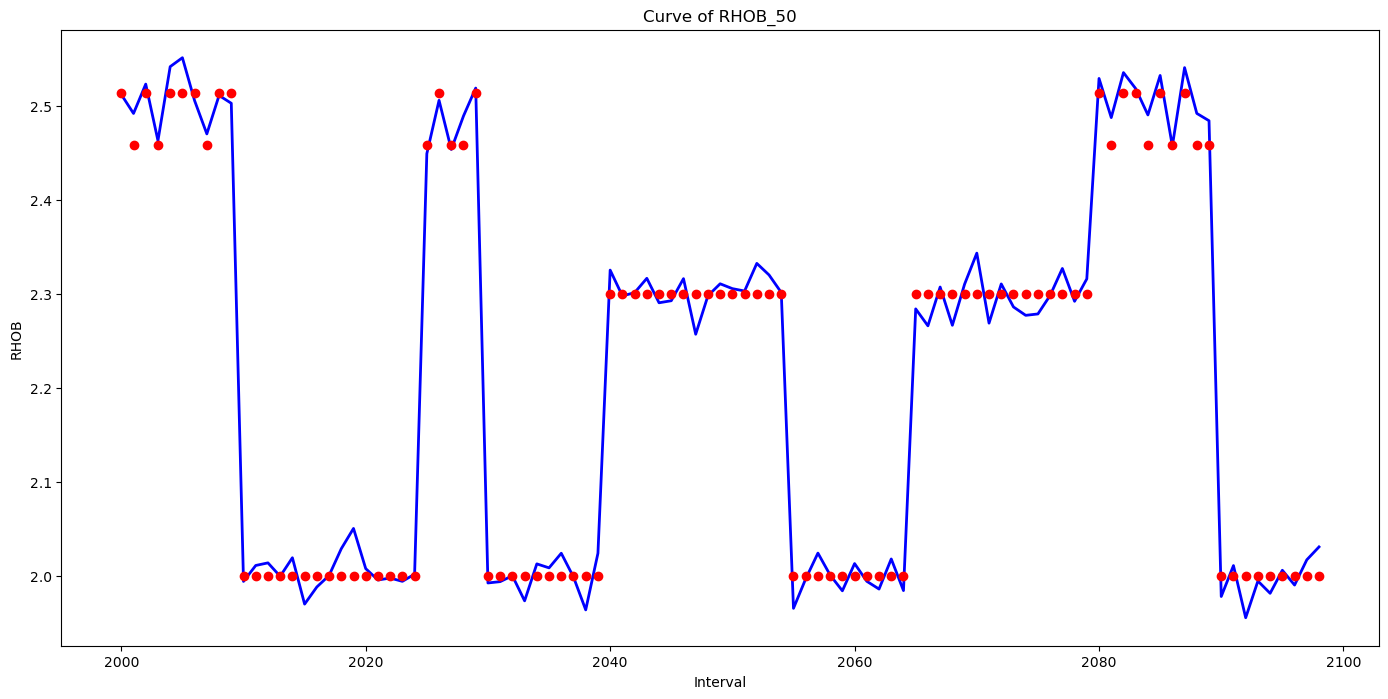

In [23]:
# визуализируем с приближением 4-мя прямыми

deltaf_left_mean = deltaf_left.mean()
deltaf_centr_left_mean = deltaf_centr_left.mean()
deltaf_centr_right_mean = deltaf_centr_right.mean()
deltaf_right_mean = deltaf_right.mean()

deltaf_left_plot = [deltaf_left_mean for i in range(99)]
deltaf_centr_left_plot = [deltaf_centr_left_mean for i in range(99)]
deltaf_centr_right_plot = [deltaf_centr_right_mean for i in range(99)]
deltaf_right_plot = [deltaf_right_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_50, c = 'b', lw = 2)

for i in range(99):
    if rhob_50[i] >= 2.5:
        plt.plot(interval[i], deltaf_right_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_50[i] < 2.5 and rhob_50[i] > 2.4:
        plt.plot(interval[i], deltaf_centr_right_plot[i], c = 'r', marker = 'o', ls = '--')
    
    elif rhob_50[i] < 2.4 and rhob_50[i] > 2.2:
        plt.plot(interval[i], deltaf_centr_left_plot[i], c = 'r', marker = 'o', ls = '--')
    else:
        plt.plot(interval[i], deltaf_left_plot[i], c = 'r', marker = 'o', ls = '--')

plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_50')

plt.show()

In [31]:
# Теперь, для сравнения с приближением четыремя прямыми, разабъем массив на 5 части
# Оценим насколько приближение 5-ю прямыми лучше, чем 4

def separate_on_five_arrays(array):
    
    new_array = np.array(sorted(array))
    
    k = 1 # наша 1 граница
    m = 2 # наша 2 граница
    n = 3 # наша 3 граница
    p = 4 # наша 4 граница
    

    loss_array_5 = [] # здесь будет храниться минимальная сумма функций потерь (квадрат отклонения от среднего)
    kmnp_array = [] # здесь хранятся соответствующие границы (k m n p) - наилучшее разбиение

    for k_bound in range(1, 95): # последняя граница - после 95го

        for m_bound in range(k_bound + 1, 96): # последняя граница - после 96го

            for n_bound in range(m_bound+1, 97): # последняя граница - после 97го
                
                for p_bound in range(n_bound+1, 98): # последняя граница - после 98го

                    sum_loss = 0  # сумма лосс-функций
                    left_loss = 0 # функция ошибок первой части исходного массива
                    central_1_loss = 0 # функция ошибок для второй части массива
                    central_2_loss = 0 # функция ошибок для третьей части массива
                    central_3_loss = 0 # функция ошибок для четвертой части массива
                    right_loss = 0 # функция ошибок для пятой части массива

                    left_arr = new_array[:k_bound] # разделяем массив по границе k - изначально она стоит после первого элемента, заканчивается перед последним эл-том
                    central_1_arr = new_array[k_bound:m_bound]
                    central_2_arr = new_array[m_bound:n_bound]
                    central_3_arr = new_array[n_bound:p_bound]
                    right_arr = new_array[p_bound:]

                    left_loss = np.var(left_arr) # считаем сумму квадратов отклонений от среднего
                    right_loss = np.var(right_arr)
                    central_1_loss = np.var(central_1_arr)
                    central_2_loss = np.var(central_2_arr)
                    central_3_loss = np.var(central_3_arr)

                    sum_loss = left_loss + central_1_loss + central_2_loss + central_3_loss + right_loss  # суммируем квадраты отклонения от среднего

                    loss_array_5.append(sum_loss)
                    kmnp_array.append((k_bound, m_bound, n_bound, p_bound)) # здесь две соответствующие границы k и m
    

    
    # разбиваем исходный массив относительно найденных границ k m n
    
    min_ind = np.argmin(loss_array_5)
    k_bound = kmnp_array[min_ind][0]
    m_bound = kmnp_array[min_ind][1]
    n_bound = kmnp_array[min_ind][2]
    p_bound = kmnp_array[min_ind][3]
    sum_for_check_5 = loss_array_5[min_ind]
    
    print(f'Лучшее разбиение -  после {k_bound} , {m_bound} , {n_bound}, {p_bound} элементов ставим границу')
    
    deltaf_left = new_array[:k_bound]
    deltaf_centr_1 = new_array[k_bound:m_bound]
    deltaf_centr_2 = new_array[m_bound:n_bound]
    deltaf_centr_3 = new_array[n_bound:p_bound]
    deltaf_right = new_array[p_bound:]
    
    return deltaf_left, deltaf_centr_1, deltaf_centr_2, deltaf_centr_3, deltaf_right, sum_for_check_5

deltaf_left, deltaf_centr_1, deltaf_centr_2, deltaf_centr_3, deltaf_right, sum_for_check_5  = separate_on_five_arrays(rhob_50)


Лучшее разбиение -  после 44 , 74 , 79, 90 элементов ставим границу


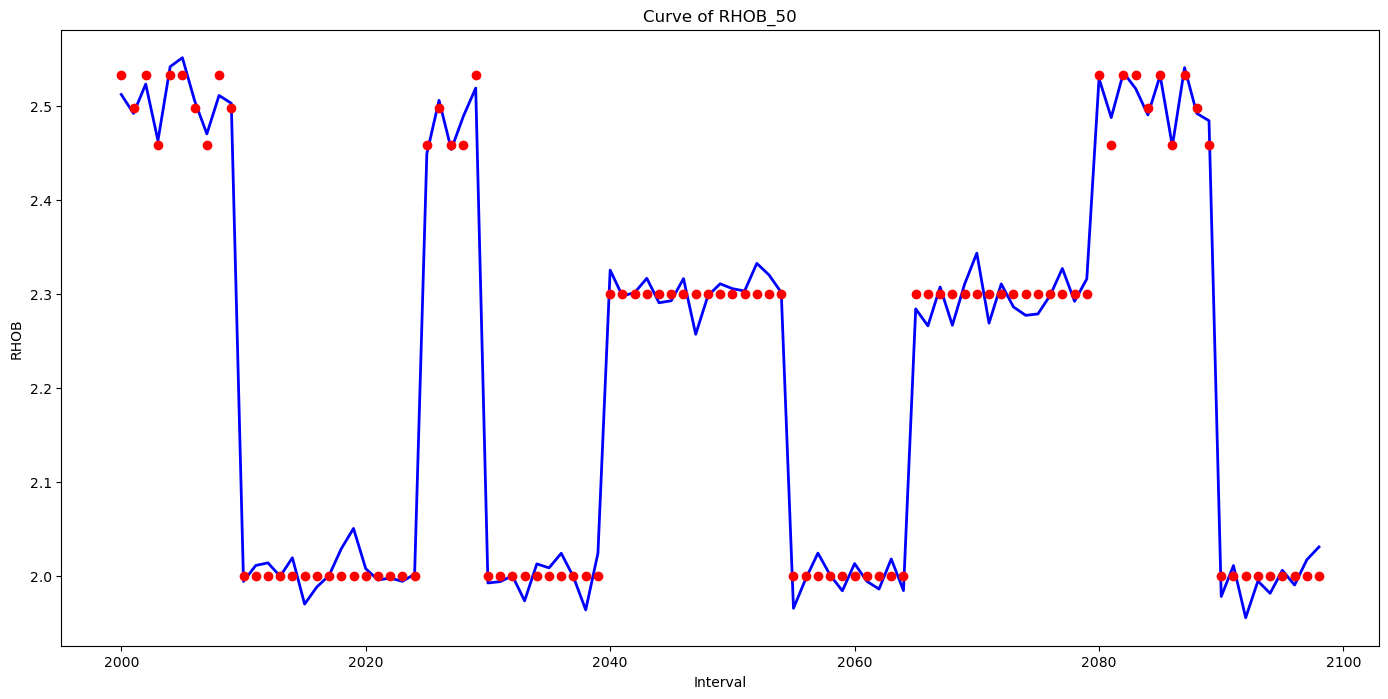

In [53]:
# визуализируем с приближением 5-мя прямыми

deltaf_left_mean = deltaf_left.mean()
deltaf_centr_1_mean = deltaf_centr_1.mean()
deltaf_centr_2_mean = deltaf_centr_2.mean()
deltaf_centr_3_mean = deltaf_centr_3.mean()
deltaf_right_mean = deltaf_right.mean()

deltaf_left_plot = [deltaf_left_mean for i in range(99)]
deltaf_centr_1_plot = [deltaf_centr_1_mean for i in range(99)]
deltaf_centr_2_plot = [deltaf_centr_2_mean for i in range(99)]
deltaf_centr_3_plot = [deltaf_centr_3_mean for i in range(99)]
deltaf_right_plot = [deltaf_right_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_50, c = 'b', lw = 2)

for i in range(99):
    if rhob_50[i] > 2.51:
        plt.plot(interval[i], deltaf_right_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_50[i] < 2.51 and rhob_50[i] >= 2.49:
        plt.plot(interval[i], deltaf_centr_3_plot[i], c = 'r', marker = 'o', ls = '--')
    
    elif rhob_50[i] < 2.49 and rhob_50[i] > 2.4:
        plt.plot(interval[i], deltaf_centr_2_plot[i], c = 'r', marker = 'o', ls = '--')
    
    elif rhob_50[i] < 2.4 and rhob_50[i] > 2.2:
        plt.plot(interval[i], deltaf_centr_1_plot[i], c = 'r', marker = 'o', ls = '--')
        
    else:
        plt.plot(interval[i], deltaf_left_plot[i], c = 'r', marker = 'o', ls = '--')
        

plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_50')

plt.show()

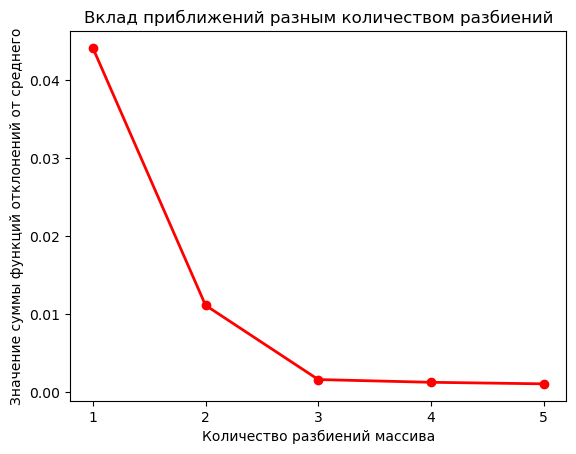

In [33]:
# Визуализируем как меняются суммы ошибок для разных приболижений (от 1 до 5)

n_separate = [1,2,3,4,5]
sum_array = [sum_for_check_1, sum_for_check_2, sum_for_check_3, sum_for_check_4, sum_for_check_5]

plt.plot(n_separate, sum_array, marker = 'o', c = 'r', lw = 2)
plt.xlabel('Количество разбиений массива')
plt.ylabel('Значение суммы функций отклонений от среднего')
plt.title('Вклад приближений разным количеством разбиений')
plt.xticks(ticks=[1,2,3,4,5])
plt.show()

ТАКИМ ОБРАЗОМ, ДЛЯ RHOB_50 ВПОЛНЕ ХОРОШЕЕ ПРИБЛИЖЕНИЕ ДОСТИГАЕТСЯ 3-МЯ ПРЯМЫМИ

ДЛЯ RHOB_30

In [24]:
df_30 = rhob_30.mean() # Делаем первое приближение с помощью среднего

sum_for_check_1 = np.var(rhob_30) # чтобы оценить вклад приближения, везде будем фиксировать sum_for_check

In [25]:
deltaf_1, deltaf_2, sum_for_check_2 = separate_on_two_arrays(rhob_30) # Приближение 2-мя прямыми

deltaf_l, deltaf_c, deltaf_r, sum_for_check_3 = separate_on_three_arrays(rhob_30)  # Приближение 3-мя прямыми

# Приближение 4-мя прямыми
deltaf_left, deltaf_centr_left, deltaf_centr_right, deltaf_right, sum_for_check_4 = separate_on_four_arrays(rhob_30)


Лучшее разбиение -  после 44 элемента ставим границу
Лучшее разбиение -  после 44 и 74 элементов ставим границу
Лучшее разбиение -  после 44 , 56 и 74 элементов ставим границу


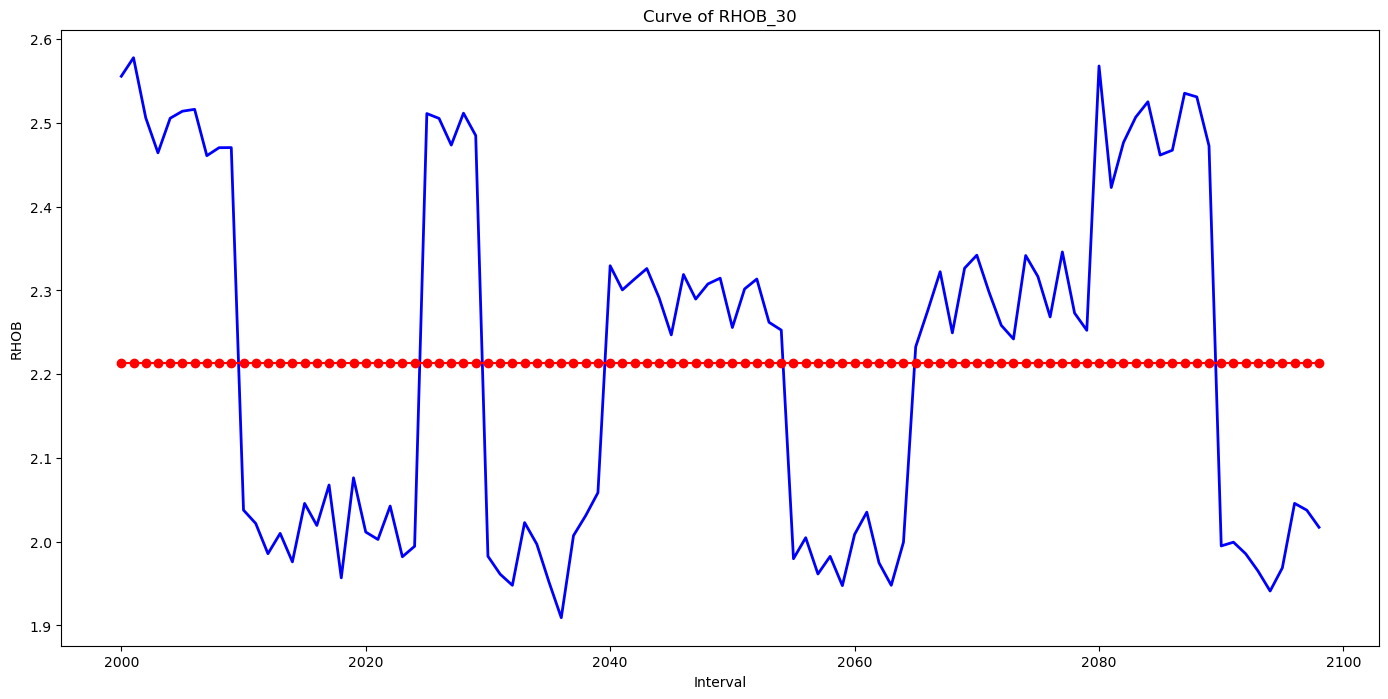

In [26]:
# Приближение среднего

df_1_plot = [df_30 for i in range(99)]

plt.figure(figsize=(17,8))

plt.plot(interval, rhob_30, c = 'b', lw = 2)
plt.plot(interval, df_1_plot, c = 'r', marker = 'o')
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_30')

plt.show()

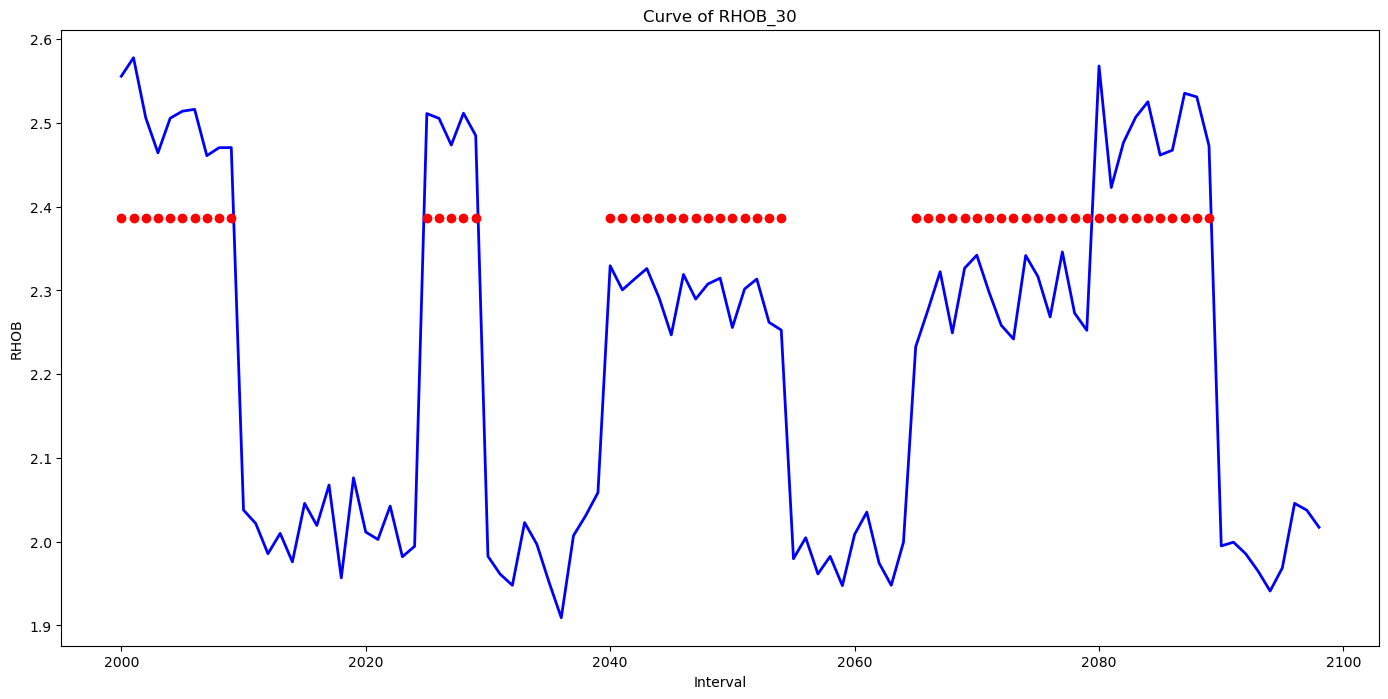

In [27]:
# Визуализируем приближения двумя линиями

deltaf_1_mean = deltaf_1.mean()
deltaf_2_mean = deltaf_2.mean()

deltaf_1_plot = [deltaf_1_mean for i in range(99)]
deltaf_2_plot = [deltaf_2_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_30, c = 'b', lw = 2)

for i in range(99):
    if rhob_30[i] > 2.2:
        plt.plot(interval[i], deltaf_2_plot[i], c = 'r', marker = 'o')
    else:
        plt.plot(interval[i], deltaf_1_plot[i], c = 'r', marker = 'o')

plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_30')

plt.show()

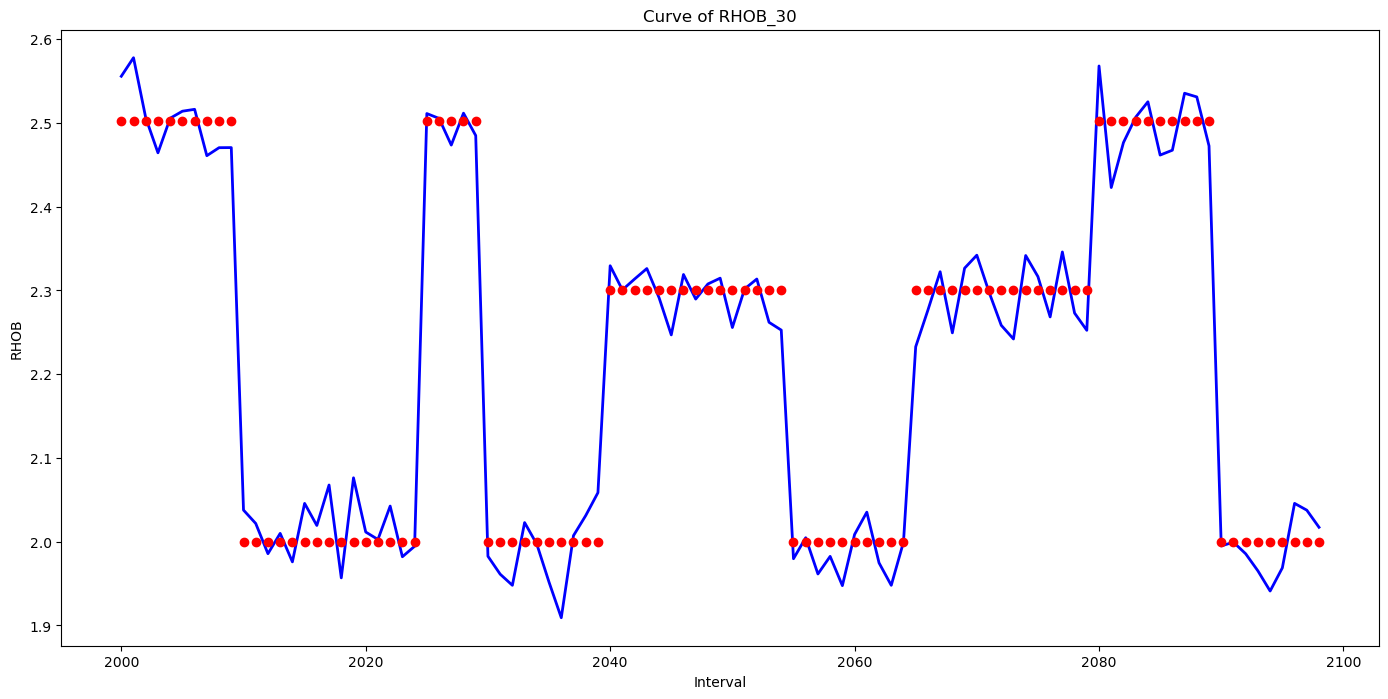

In [55]:
# Визуализируем с приближением тремя прямыми

deltaf_l_mean = deltaf_l.mean()
deltaf_c_mean = deltaf_c.mean()
deltaf_r_mean = deltaf_r.mean()

deltaf_l_plot = [deltaf_l_mean for i in range(99)]
deltaf_c_plot = [deltaf_c_mean for i in range(99)]
deltaf_r_plot = [deltaf_r_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_30, c = 'b', lw = 2)

for i in range(99):
    if rhob_30[i] > 2.4:
        plt.plot(interval[i], deltaf_r_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_30[i] < 2.4 and rhob_30[i] > 2.2:
        plt.plot(interval[i], deltaf_c_plot[i], c = 'r', marker = 'o', ls = '--')
    else:
        plt.plot(interval[i], deltaf_l_plot[i], c = 'r', marker = 'o', ls = '--')
        

plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_30')

plt.show()

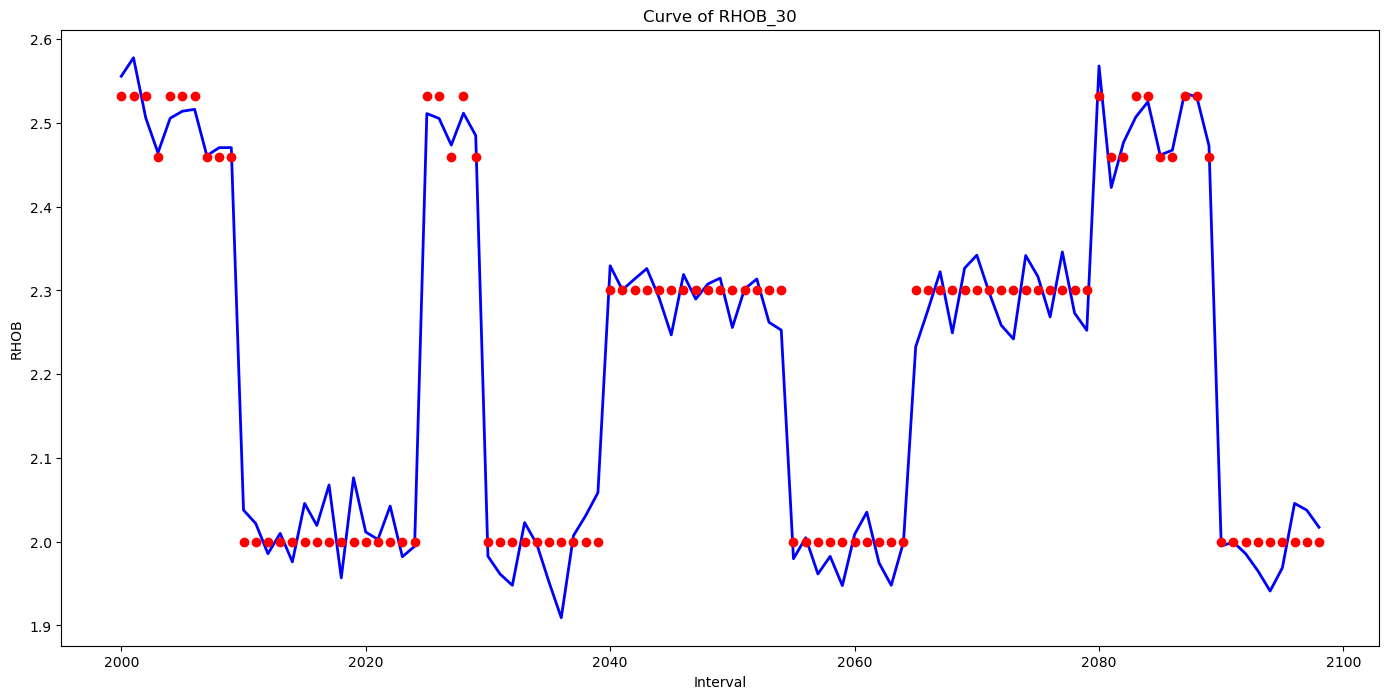

In [56]:
# визуализируем с приближением 4-мя прямыми

deltaf_left_mean = deltaf_left.mean()
deltaf_centr_left_mean = deltaf_centr_left.mean()
deltaf_centr_right_mean = deltaf_centr_right.mean()
deltaf_right_mean = deltaf_right.mean()

deltaf_left_plot = [deltaf_left_mean for i in range(99)]
deltaf_centr_left_plot = [deltaf_centr_left_mean for i in range(99)]
deltaf_centr_right_plot = [deltaf_centr_right_mean for i in range(99)]
deltaf_right_plot = [deltaf_right_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_30, c = 'b', lw = 2)

for i in range(99):
    if rhob_30[i] >= 2.5:
        plt.plot(interval[i], deltaf_right_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_30[i] < 2.5 and rhob_30[i] > 2.4:
        plt.plot(interval[i], deltaf_centr_right_plot[i], c = 'r', marker = 'o', ls = '--')
    
    elif rhob_30[i] < 2.4 and rhob_30[i] > 2.2:
        plt.plot(interval[i], deltaf_centr_left_plot[i], c = 'r', marker = 'o', ls = '--')
    else:
        plt.plot(interval[i], deltaf_left_plot[i], c = 'r', marker = 'o', ls = '--')
        
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_30')

plt.show()

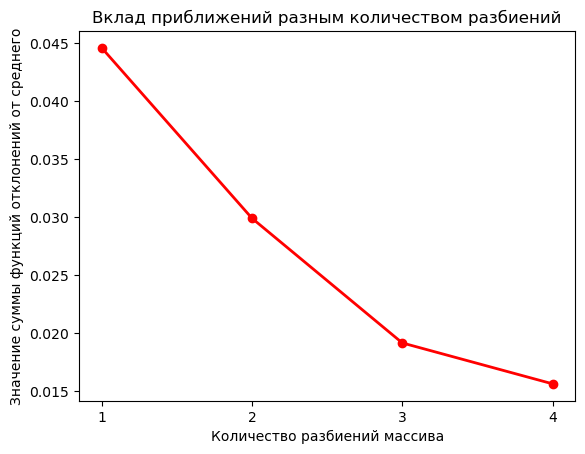

In [372]:
# Визуализируем как меняются суммы ошибок для разных приболижений (от 1 до 4)

n_separate = [1,2,3,4]
sum_array = [sum_for_check_1, sum_for_check_2, sum_for_check_3, sum_for_check_4]

plt.plot(n_separate, sum_array, marker = 'o', c = 'r', lw = 2)
plt.xlabel('Количество разбиений массива')
plt.ylabel('Значение суммы функций отклонений от среднего')
plt.title('Вклад приближений разным количеством разбиений')
plt.xticks(ticks=[1,2,3,4])
plt.show()

В ситуации с RHOB_30 все аналогично - приближения 3-мя прямыми очень неплохое. Отличие в том, что в случае RHOB_30 отклонение от среднего (лосс-функция) даже на 4ом приближении больше, чем лосс-функция RHOB_50 на 2ом приближении. Всему виной, видимо, зашумленность данных

RHOB_10

In [64]:
df_10 = rhob_10.mean() # Делаем первое приближение с помощью среднего

sum_for_check_1 = np.var(rhob_10) # чтобы оценить вклад приближения, везде будем фиксировать sum_for_check

In [65]:
deltaf_1, deltaf_2, sum_for_check_2 = separate_on_two_arrays(rhob_10) # Приближение 2-мя прямыми

deltaf_l, deltaf_c, deltaf_r, sum_for_check_3 = separate_on_three_arrays(rhob_10)  # Приближение 3-мя прямыми

# Приближение 4-мя прямыми
deltaf_left, deltaf_centr_left, deltaf_centr_right, deltaf_right, sum_for_check_4 = separate_on_four_arrays(rhob_10)

Лучшее разбиение -  после 46 элемента ставим границу
Лучшее разбиение -  после 34 и 72 элементов ставим границу
Лучшее разбиение -  после 34 , 48 и 72 элементов ставим границу


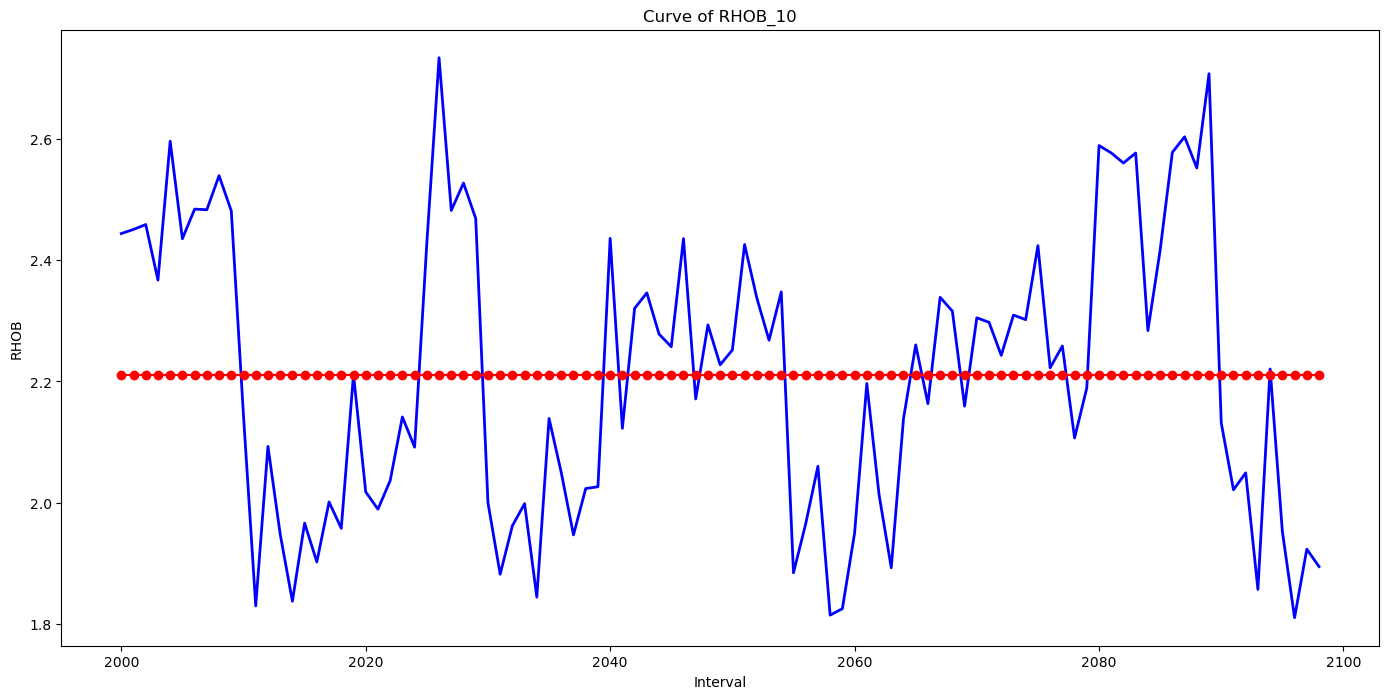

In [66]:
# Приближение среднего

df_1_plot = [df_10 for i in range(99)]

plt.figure(figsize=(17,8))

plt.plot(interval, rhob_10, c = 'b', lw = 2)
plt.plot(interval, df_1_plot, c = 'r', marker = 'o')
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_10')

plt.show()

In [1]:
# Визуализируем приближения двумя линиями

deltaf_1_mean = deltaf_1.mean()
deltaf_2_mean = deltaf_2.mean()

deltaf_1_plot = [deltaf_1_mean for i in range(99)]
deltaf_2_plot = [deltaf_2_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_10, c = 'b', lw = 2)

for i in range(99):
    if rhob_10[i] > 2.15:
        plt.plot(interval[i], deltaf_2_plot[i], c = 'r', marker = 'o')
#     else:
#         plt.plot(interval[i], deltaf_1_plot[i], c = 'r', marker = 'o')
        
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_10')

plt.show()

NameError: name 'deltaf_1' is not defined

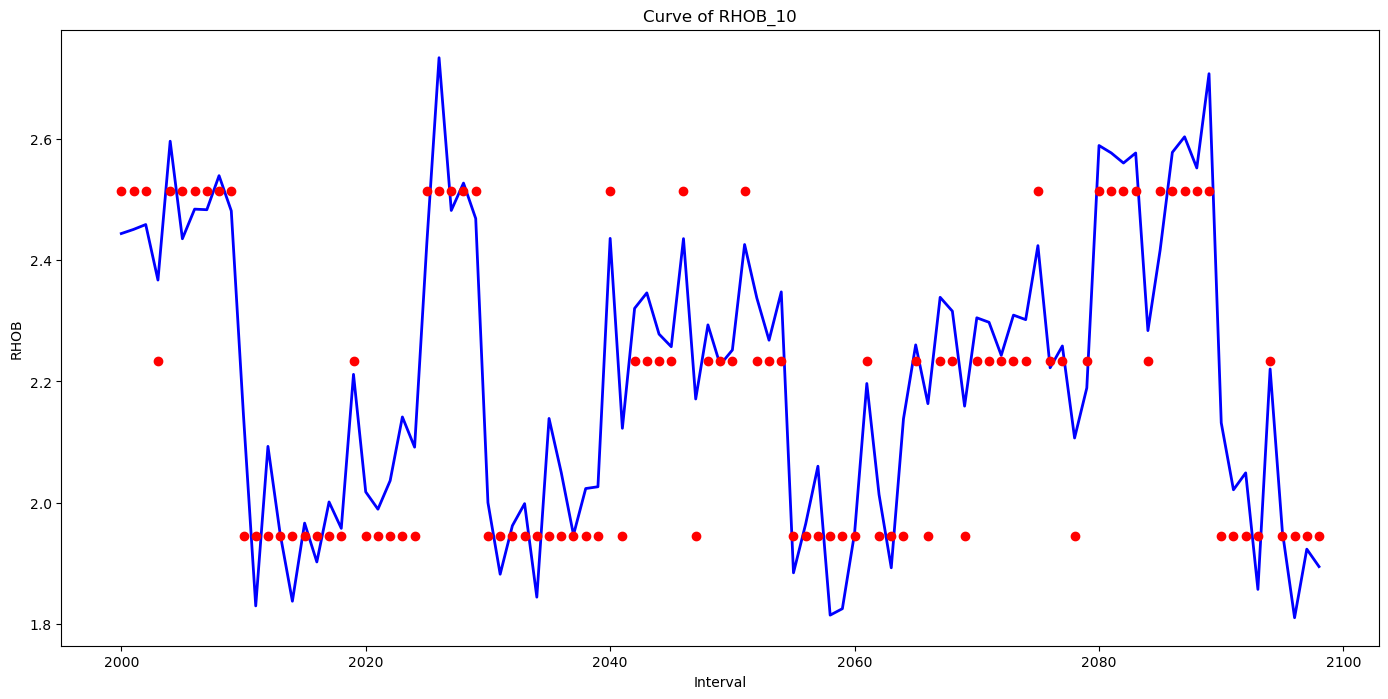

In [73]:
# Визуализируем с приближением тремя прямыми

deltaf_l_mean = deltaf_l.mean()
deltaf_c_mean = deltaf_c.mean()
deltaf_r_mean = deltaf_r.mean()

deltaf_l_plot = [deltaf_l_mean for i in range(99)]
deltaf_c_plot = [deltaf_c_mean for i in range(99)]
deltaf_r_plot = [deltaf_r_mean for i in range(99)]


plt.figure(figsize=(17,8))

plt.plot(interval, rhob_10, c = 'b', lw = 2)

for i in range(99):
    if rhob_10[i] >= 2.4:
        plt.plot(interval[i], deltaf_r_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_10[i] <= 2.4 and rhob_10[i] > 2.18:
        plt.plot(interval[i], deltaf_c_plot[i], c = 'r', marker = 'o', ls = '--')
    else:
        plt.plot(interval[i], deltaf_l_plot[i], c = 'r', marker = 'o', ls = '--')
        
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_10')

plt.show()

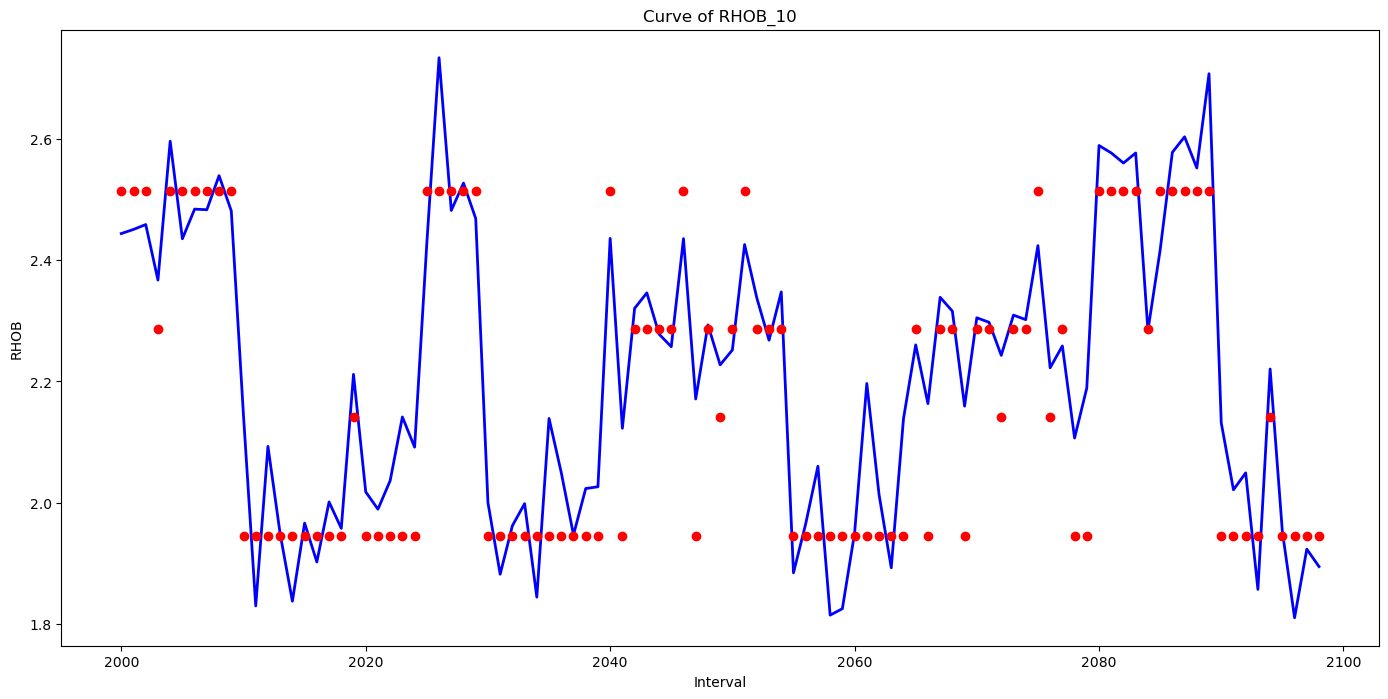

In [76]:
# визуализируем с приближением 4-мя прямыми

deltaf_left_mean = deltaf_left.mean()
deltaf_centr_left_mean = deltaf_centr_left.mean()
deltaf_centr_right_mean = deltaf_centr_right.mean()
deltaf_right_mean = deltaf_right.mean()

deltaf_left_plot = [deltaf_left_mean for i in range(99)]
deltaf_centr_left_plot = [deltaf_centr_left_mean for i in range(99)]
deltaf_centr_right_plot = [deltaf_centr_right_mean for i in range(99)]
deltaf_right_plot = [deltaf_right_mean for i in range(99)]


plt.figure(figsize=(17,8))
plt.plot(interval, rhob_10, c = 'b', lw = 2)

for i in range(99):
    if rhob_10[i] >= 2.38:
        plt.plot(interval[i], deltaf_right_plot[i], c = 'r', marker = 'o', ls = '--')
    elif rhob_10[i] < 2.38 and rhob_10[i] > 2.25:
        plt.plot(interval[i], deltaf_centr_right_plot[i], c = 'r', marker = 'o', ls = '--')
    
    elif rhob_10[i] < 2.25 and rhob_10[i] > 2.2:
        plt.plot(interval[i], deltaf_centr_left_plot[i], c = 'r', marker = 'o', ls = '--')
    else:
        plt.plot(interval[i], deltaf_left_plot[i], c = 'r', marker = 'o', ls = '--')
        
plt.xlabel('Interval')
plt.ylabel('RHOB')
plt.title('Curve of RHOB_10')

plt.show()

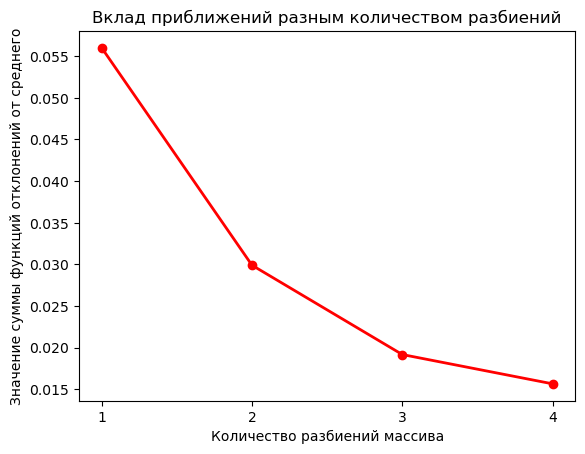

In [369]:
# Визуализируем как меняются суммы ошибок для разных приболижений (от 1 до 4)

n_separate = [1,2,3,4]
sum_array = [sum_for_check_1, sum_for_check_2, sum_for_check_3, sum_for_check_4]

plt.plot(n_separate, sum_array, marker = 'o', c = 'r', lw = 2)
plt.xlabel('Количество разбиений массива')
plt.ylabel('Значение суммы функций отклонений от среднего')
plt.title('Вклад приближений разным количеством разбиений')
plt.xticks(ticks=[1,2,3,4])
plt.show()

In [ ]:
В ситуации с RHOB_10 неплохое приближение и 2-мя и 3-мя прямыми, за счет зашумленности. На аппроксимации много выбросов